Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
- Приятное оформление выводов и структурированность кода в целом!  Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
- Жду твой обновленный проект =)



<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[3]</font>
* Спасибо за оперативность
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    TimeSeriesSplit
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder
)
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


## Подготовка

In [ ]:
data = pd.read_csv('/data/taxi.csv', index_col=[0], parse_dates=[0])



<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что использолованы параметры index_col и parse_dates
</div>


In [3]:
display(data.head(10))
data.info()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
data.sort_index(inplace=True)
data = data.resample('1H').sum()


<div class="alert alert-block alert-success">
<b>Успех:</b> ресемпилнг был сделан верно.
</div>


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Признаки нужно выбирать после проведенного анализа. Наши календарные признаки подчеркивают сезонность. Относительно сезонности признаки идут на один уровень ниже. Если у нас суточная сезонность, то логично создавать признак часа (час одного дня похож на тот же час другого), если недельная - день недели.
    
Поэтому фактор месяц нам не сильно подходит: у нас в истории всего один март, май.... Да и горизонт прогноза - часы. 
    



</div>      


<div class="alert alert-block alert-info">
<b>Совет:</b> пару строк про lag и скользящее среднее
    
Lag: его называют ещё параметром авторегрессии.<br>Допустим lag=1 - учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - влияют на сегодняшние.<br>Lag=2: учитывает как позавчерашние продажи влияютна сегодняшние.....<br><br><br>
    
По скользящему среднего:<br>
Предположим rolling=10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. - это некое подобие тренда будет - средней линии. Т.е. - сглаживание колебаний/выбросов. Это легко увидеть на пределе: допустим длина ряда 100 дней. rolling(100) - это просто одно число - среднее всего ряда. <br><br><br>
    
    
    
**Обычно так происходит поиск параметров:**

1) узнаём , какая у нас сезонность: в нашем случае их две - часовая и день недели (суточная и недельная)<br>
2) Узнайм, какой у нас тренд. пусть будет пока rolling (24) - сутки<br>
3) строим модель (без лагов).<br>
4) строим график автокорреляции остатков (факт - прогноз). Если видим "зубья" на сезонных лагах: 24, 24*7 - то мы плохо жанной моделью учли сезонность.<br>
Если высокий "зуб"(столбец на графике) на на первом лаге, то ндо вводить в модель фактор lag=1.
и перестроить модель. И так по кругу.<br><br>   
    
Поэтому, если выставить сезонности - час и день недели, то дополнительные факторы желательно начинать с таких значений : лаг =1,2 а скользящее среднее = 24 (среднее за сутки).  В итоге модель будет приемлемая по точности и не много факторов.. а это значит и для бизнеса будет легче доносить решение). Но, если нужно улучшить качество, то в нашем же случае лаг в 24 (день) и 168 (неделя) - тоже имеют смысл.
</div>


## Анализ

In [5]:
min_date = data.index.min()
max_date = data.index.max()
print(f'{min_date} : {max_date}')

2018-03-01 00:00:00 : 2018-08-31 23:00:00


In [6]:
display(data.describe())

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Стандартное отклонение 45, указывает на значительную изменчивость в данных.
Большинство значений (50% данных) лежат в диапазоне от 54 до 104, что согласуется с наличием редких пиковых значений.

<AxesSubplot:title={'center':'Number of orders over time'}, xlabel='datetime', ylabel='Number of orders'>

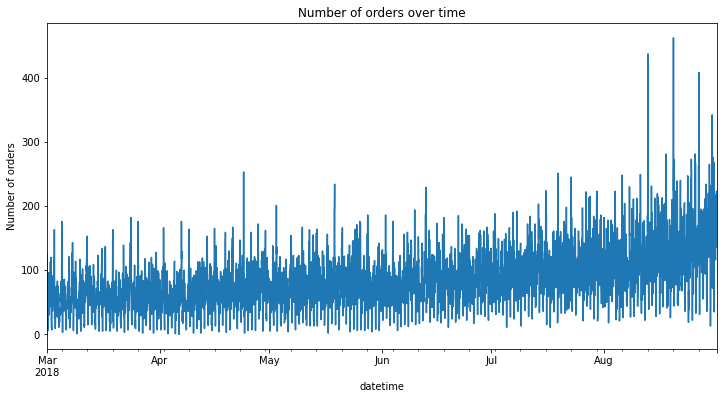

In [7]:
data['num_orders'].plot(figsize=(12, 6), title='Number of orders over time', ylabel='Number of orders')

Наблюдается тренд на увеличение числа заказов с течением времени. Это может указывать на общий рост спроса на такси в рассматриваемом периоде.
Также видны флуктуации — периоды резкого увеличения и уменьшения заказов. Это может быть связано с сезонностью или внешними факторами (например, праздниками или событиями).

<AxesSubplot:title={'center':'Average orders per hour of the day'}, xlabel='datetime'>

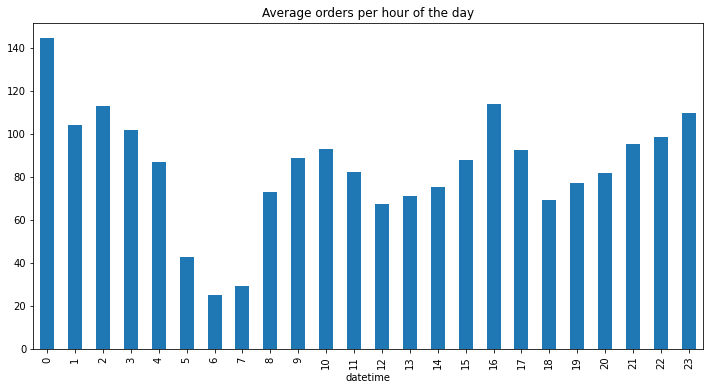

In [8]:
data.groupby(data.index.hour)['num_orders'].mean().plot(
    kind='bar', figsize=(12, 6), title='Average orders per hour of the day'
)

Максимальное число заказов наблюдается в 00:00–02:00, что может быть связано с возвращением людей из аэропорта после вечерних рейсов.
Низкий спрос на такси с 3:00 до 6:00, что естественно для ночных часов.
Снова наблюдается рост с 7:00 (начало рабочего дня) и пик в 18:00–22:00 (возвращение домой или поздние поездки).

<AxesSubplot:title={'center':'Average orders per day'}, xlabel='datetime'>

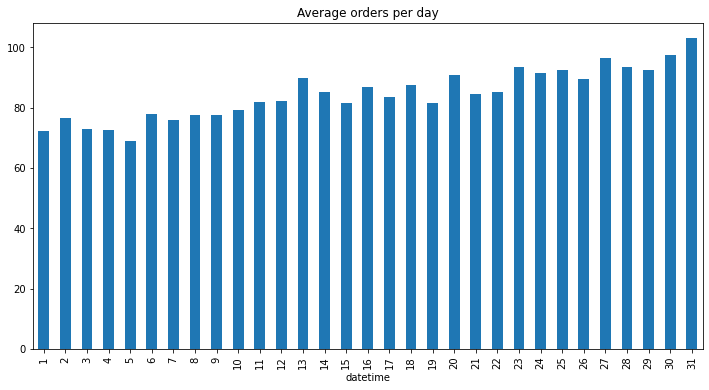

In [9]:
data.groupby(data.index.day)['num_orders'].mean().plot(
    kind='bar', figsize=(12, 6), title='Average orders per day'
)

Распределение относительно равномерное, но видна тенденция роста заказов в конце месяца. Это может быть связано с определёнными циклами активности (например, зарплатные дни или повышенный спрос в конце месяца).

<AxesSubplot:title={'center':'Average orders per weekday'}, xlabel='datetime'>

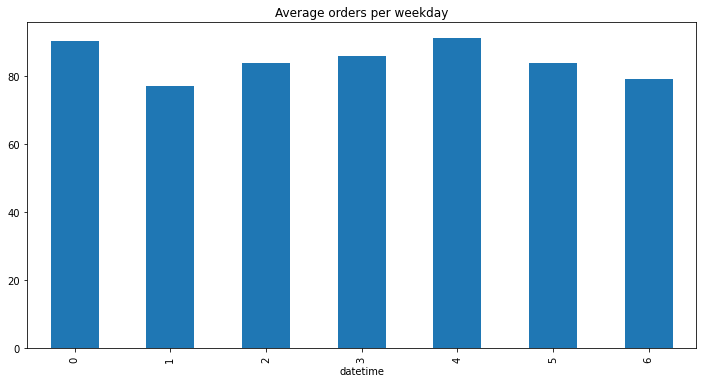

In [10]:
data.groupby(data.index.weekday)['num_orders'].mean().plot(
    kind='bar', figsize=(12, 6), title='Average orders per weekday'
)

<AxesSubplot:title={'center':'Average orders per month'}, xlabel='datetime'>

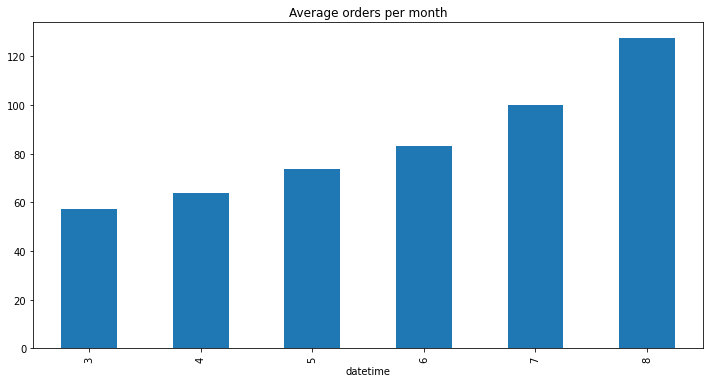

In [11]:
data.groupby(data.index.month)['num_orders'].mean().plot(
    kind='bar', figsize=(12, 6), title='Average orders per month'
)

График среднего количества заказов по месяцам также показывает явный рост заказов от марта до августа.

<Figure size 864x576 with 0 Axes>

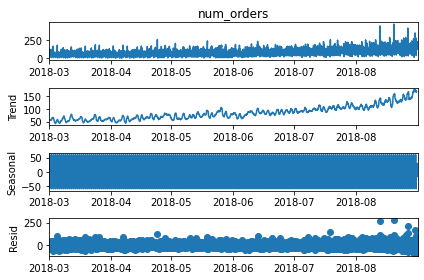

In [12]:
# Выявление тренда и сезонности
decomposition = sm.tsa.seasonal_decompose(data['num_orders'], period=24)
fig = plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

Trend (тренд): Видно постепенное увеличение количества заказов во времени, что подтверждает выводы из предыдущих графиков.

Seasonal (сезонность): Сезонные колебания хорошо видны. Пример: высокий спрос в определённое время суток (например, вечер), а также недельные циклы (выходные или будние дни).

Residual (остатки): Остатки указывают на случайные флуктуации, которые не объясняются трендом или сезонностью.

<div class="alert alert-block alert-success">
  
<b>Успех:</b> Осмотр сделан неплохо.

Здесь можно дополнить вывод по аналитике: тренд постоянный, с ускорением? Растет число заказов по август? а в августе как обстоят дела?
    
    
Важно также изучить недельную сезонность. Удобнее всего ее увидеть, если сделать дополнительное ресемплирование (сохраняем в другую переменную, так как дальше в проекте будем работать с ресемплированием по часам и важно его не потерять) по дням. И также берем несколько недель.


По «остаткам» или шуму. Нужно посмотреть, на всем ли протяжении доля остатков одинаковая? Если если «остатков» к концу графика больше, значит в тестовую выборку попадет чуть больше данных, которые сложно объяснить и на которых модели будет сложнее предсказывать. Поэтому относительно большая (по сравнению с другими задачами машинного обучения) разница между метриками при обучении и исследовании, и между тестовой выборкой, не обязательно будет объясняться только переобучением модели.

       
</div>

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Дополнительно  полезно оценивать стационарность ряда с помощью теста Дики-Фуллера: в реальных задачах с временными рядами, в особенности - с финансовыми данными или биржевыми котировками, график не всегда поможет достоверно оценить стационарность ряда, поэтому для оценки стационарности ряда лучше использовать тест Дики — Фуллера (подробнее о нём можно глянуть тут: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html, а вот тут можно глянуть пример реализации: https://www.helenkapatsa.ru/tiest-diki-fulliera/) - он даст наиболее точный результат. Результат нужно проверить на уровнях значимости 1% и 5%, чтобы быть уверенным в выводах. Не забудь при применении теста сформулировать гипотезы - нулевая формулируется как гипотеза о нестацинарности ряда, а альтернативная - как гипотеза о стационарности ряда. Также при проведении теста не забывай, что мы сравниваем `p-value` с уровнем значимости `alpha`.
</div>



## Обучение

Чтоб модель учла дневную сезонность временного ряда, добавим:
- Лаги до 24 часов — для учёта влияния значений за предыдущие сутки.
- Скользящее среднее с окном 24 часа — для сглаживания шума и выделения тренда.

In [13]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

<div class="alert alert-block alert-danger">
    
<b>Ошибка[2]:</b> Повторю главное: `Наши календарные признаки подчеркивают сезонность. Относительно сезонности признаки идут на один уровень ниже. Если у нас суточная сезонность, то логично создавать признак часа (час одного дня похож на тот же час другого), если недельная - день недели.`
    
Поэтому фактор месяц нам не сильно подходит: у нас в истории всего один март, май.... Да и горизонт прогноза - часы. 
    
А вот фактор часа у тебя отсутствует, хотя он был бы актуален здесь



</div>      



<div class="alert alert-block alert-success">
    
<b>Успех[3]:</b> 👍 Есть контакт
</div>

In [14]:
make_features(data, 24, 24)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   hour          4416 non-null   int64  
 2   day           4416 non-null   int64  
 3   dayofweek     4416 non-null   int64  
 4   lag_1         4415 non-null   float64
 5   lag_2         4414 non-null   float64
 6   lag_3         4413 non-null   float64
 7   lag_4         4412 non-null   float64
 8   lag_5         4411 non-null   float64
 9   lag_6         4410 non-null   float64
 10  lag_7         4409 non-null   float64
 11  lag_8         4408 non-null   float64
 12  lag_9         4407 non-null   float64
 13  lag_10        4406 non-null   float64
 14  lag_11        4405 non-null   float64
 15  lag_12        4404 non-null   float64
 16  lag_13        4403 non-null   float64
 17  lag_14        4402 non-null

In [15]:
# Константа для воспроизводимости
RANDOM_STATE = 42

# Удаление строк с NaN после создания лагов и скользящей средней
data = data.dropna()

tscv = TimeSeriesSplit(n_splits=5)

# Разделение данных на признаки и целевую переменную
target = data['num_orders']
features = data.drop(['num_orders'], axis=1)

# Категориальные и числовые признаки
cat_columns = ['month', 'day', 'dayofweek']
num_columns = [col for col in features.columns if col not in cat_columns]

<div class="alert alert-block alert-success">
<b>Успех:</b> Лайк за TimeSeriesSplit - важно при работе с временными рядами
</div>

In [16]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.1, shuffle=False
)

<div class="alert alert-block alert-info">

<b>Совет:</b>
Если используем `shuffle = False`, то `random_state` нам уже не нужен.
</div> 



In [17]:
# Функция для расчета RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = make_scorer(rmse, greater_is_better=False)

In [18]:
# Создание pipeline для Ridge Regression 
pipe_ridge = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()), 
    ('model', Ridge(random_state=RANDOM_STATE)) 
]) 

# Указание параметров для RandomizedSearchCV 
param_ridge = { 
    'model__alpha': [0.1, 1.0, 10.0, 100.0] 
} 

# Перебор параметров для Ridge Regression 
rs_ridge = RandomizedSearchCV( 
    pipe_ridge, 
    param_ridge, 
    cv=tscv, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1, 
    refit=True, 
    random_state=RANDOM_STATE 
) 

# Обучение модели для Ridge Regression 
rs_ridge.fit(X_train, y_train) 

# Вывод результатов обучения 
best_ridge = rs_ridge.best_estimator_ 

print("Лучшие параметры для Ridge Regression:", rs_ridge.best_params_) 
print("Средний RMSE на кросс-валидации для Ridge Regression:", round(np.abs(rs_ridge.best_score_), 3))

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшие параметры для Ridge Regression: {'model__alpha': 100.0}
Средний RMSE на кросс-валидации для Ridge Regression: 27.124


In [19]:
# Создание pipeline для RandomForestRegressor
pipe_rf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', RandomForestRegressor(random_state=RANDOM_STATE))
])

# Указание параметров для RandomizedSearchCV
param_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Перебор параметров для RandomForestRegressor
rs_rf = RandomizedSearchCV(
    pipe_rf, 
    param_rf, 
    cv=tscv, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1, 
    refit=True, 
    random_state=RANDOM_STATE
)

# Обучение модели для RandomForestRegressor
rs_rf.fit(X_train, y_train)

# Вывод результатов обучения
best_rf = rs_rf.best_estimator_

print("Лучшие параметры для Random Forest Regressor:", rs_rf.best_params_)
print("Средний RMSE на кросс-валидации для Random Forest Regressor:", round(np.abs(rs_rf.best_score_), 3))

Лучшие параметры для Random Forest Regressor: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 30}
Средний RMSE на кросс-валидации для Random Forest Regressor: 25.189


In [20]:
# Создание pipeline для LightGBM
pipe_lgb = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', lgb.LGBMRegressor(random_state=RANDOM_STATE))
])

# Параметры для RandomizedSearchCV
param_lgb = {
    'model__num_leaves': [31, 50, 100],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [-1, 10, 20]
}

# Подбор параметров с кросс-валидацией
rs_lgb = RandomizedSearchCV(
    pipe_lgb, 
    param_lgb, 
    cv=tscv, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    refit=True,
    random_state=RANDOM_STATE
)

rs_lgb.fit(X_train, y_train)

# Сохранение лучшей модели
best_lgb_model = rs_lgb.best_estimator_

# Вывод результатов
print("\nЛучшие параметры для LightGBM:", rs_lgb.best_params_)
print("Средний RMSE на кросс-валидации для LightGBM:", round(np.abs(rs_lgb.best_score_), 3))


Лучшие параметры для LightGBM: {'model__num_leaves': 50, 'model__n_estimators': 100, 'model__max_depth': -1, 'model__learning_rate': 0.05}
Средний RMSE на кросс-валидации для LightGBM: 25.01


По результатам кросс валидации, лучшим моделем оказался Light GBM с RMSE 25.01. Сделаем прогноз на этой модели и проверим качество модели на тестовой выборке.



<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично проделан шаг
    
- Радует количество рассмотренных моделей.   
- Кросс-валидационные методы успешно использованы. 
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Здесь нужно выбрать одну лучшую модель для тестирования. А после анализа и выбора одной наилучшей модели, должно идти  ее тестирование. Другие модели тестовую выборку использовать не должны.
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>

## Тестирование

In [21]:
# Предсказания для тестовой выборки
y_pred = best_lgb_model.predict(X_test)

# Расчёт RMSE для каждой модели
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Вывод результатов
print(f"RMSE на тестовой выборке для Light GBM: {rmse_test:.3f}")

RMSE на тестовой выборке для Light GBM: 41.967



<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Теперь все правильно, молодец
</div>

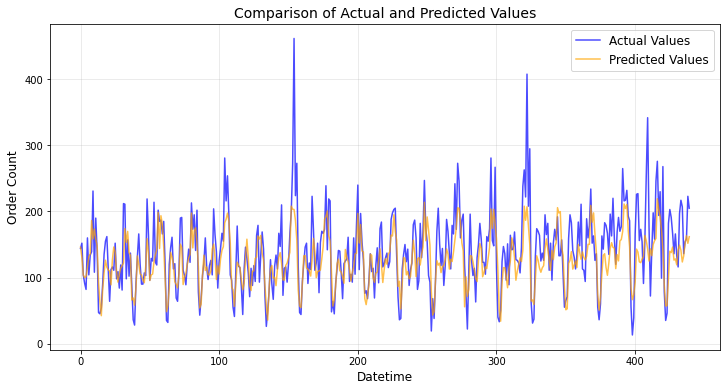

In [22]:
# Создание графика
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', color='orange', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values', fontsize=14)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Модель Light GBMхорошо справляется с прогнозом, учитывая дневную сезонность и дополнительные признаки. RMSE на тестовой выборке составил 41.967, что ниже целевого порога в 48, подтверждая достижение цели проекта. Это также видно на графике, где предсказанные значения следуют за реальными данными. Несмотря на небольшие расхождения в экстремальных значениях, модель надежно прогнозирует общий тренд и краткосрочные изменения.


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍 Есть
</div>

<div class="alert alert-info">
<b>Совет:</b>

Здесь также было бы очень полезно визуализировать предсказания твоей лучшей модели и сравнить их с правильными ответами в формате линейного графика - так мы сможем более наглядно понять, в каких местах твоя модель делает хорошие предсказания, а в каких ошибается.
        
По графику обязательно нужно сделать вывод: стоит отметить, в каких участках ряда модель сильнее ошибается, а какие участки ряда предсказывает хорошо.


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48